<a href="https://colab.research.google.com/github/XJabin/EcoFriendly-WEB/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


<ipython-input-2-5a17463cc931>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-2-5a17463cc931>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-2-5a17463cc931>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 15036297216.0000 - mae: 112411.2109 - val_loss: 14033889280.0000 - val_mae: 107636.2578
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8583653376.0000 - mae: 77628.8594 - val_loss: 3502583296.0000 - val_mae: 49039.7383
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3520522496.0000 - mae: 49563.0898 - val_loss: 2916940544.0000 - val_mae: 45667.1289
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2944617984.0000 - mae: 45530.7461 - val_loss: 2617829888.0000 - val_mae: 44035.4688
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2826061824.0000 - mae: 45195.4961 - val_loss: 2461628928.0000 - val_mae: 42987.0117
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2664096512.0000 - mae: 44346.1523 - val_loss: 2483239424.0000 - val_mae: 43064.0547
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2585131776.0000 - mae: 43432.2539 - val_loss: 2456494336.0000 - val_mae: 42885.1406
Epoch 8/20
9

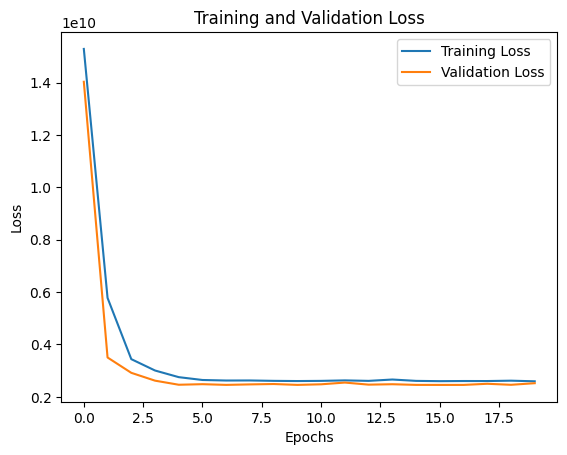

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Predicted Salary: 104763.66, Actual Salary: 68919.00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load the dataset
file_path = 'data_science_job.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna()

# Select relevant features and target
features = ['work_year', 'job_category', 'experience_level', 'company_size', 'employment_type']
target = 'salary_in_usd'

# Encode categorical features
label_encoders = {}
for col in ['job_category', 'experience_level', 'company_size', 'employment_type']:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = MinMaxScaler()
data_cleaned['work_year'] = scaler.fit_transform(data_cleaned[['work_year']])

# Define features and target
X = data_cleaned[features].values
y = data_cleaned[target].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to fit RNN input requirements
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the RNN model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=20, batch_size=32, validation_split=0.2, verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test with a single sample
sample = X_test_reshaped[0:1]  # Pick the first sample
predicted_salary = model.predict(sample)
print(f"Predicted Salary: {predicted_salary[0][0]:.2f}, Actual Salary: {y_test[0]:.2f}")
